# Diabetes Prediction ( A comparative approch using machine learning)

### Motivation

* Approximately 537 million people all over the world have been diagnosed with diabetes. The diabetes is not curable, and its ill-effects continue till the lifetime of patient. Hence, it is better to predict rather than treat the disease.It is highly appreciable when diabetes is predicted in advance. As students of Data Science ,I can work with any kind of data. Taking advantage of this, I decided to do this project in order to predict if a particular observation is at a risk of developing diabetes.

### Objective

* The main objective of project is to build a machine learning model to accurately predict whether the patients in the dataset have diabetes or not.

### Data Set

* Data Source :  https://www.kaggle.com
* The dataset is all about females patients of at least 21 years old.
* The objective of the dataset is to diagnostically predict whether the patient has diabetes.
* Dataset is consists of 768 observations and 9 variables such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
  BMI, DiabetesPedigreeFunction, Age, Outcome.
* We will directly use the outcome variable as our target variable.
   * Outcome: To express the final result 1 is Yes (Diabetic) and 0 is No (non diabetic).


In [1]:
import numpy as np                                     #  library used for working with arrays
import matplotlib.pyplot as plt                        #  create,plot,decorate figures
import seaborn as sns                                  #  data visualization
import pandas as pd                                    #  working with table data
sns.set_style('darkgrid')                              #  setting styles
import warnings
warnings.filterwarnings('ignore')                        # ignore warnings

In [2]:
df=pd.read_csv(r'D:\Data science IL\project\diabetes_Data_.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [3]:
print("Shape of Data is==>",df.shape)

Shape of Data is==> (768, 9)


In [4]:
for i in df.columns:                        # variable names
    print(i) 

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [5]:
x=pd.DataFrame(columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'])

In [6]:
 df.rename({'DiabetesPedigreeFunction':'DPF'},inplace=True,axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Missing value analysis

* 📌 Checking if there are any NULL values.


In [7]:
df.isnull().sum()                               # this will show the number of missing values.

Pregnancies        0
Glucose            2
BloodPressure     10
SkinThickness     83
Insulin          138
BMI                6
DPF                0
Age                0
Outcome            0
dtype: int64

In [8]:
df.isnull().sum()[df.isnull().sum()*100/df.shape[0]>40]

Series([], dtype: int64)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,766.000000,758.000000,685.000000,630.000000,762.000000,768.000000,768.000000,768.000000
mean,3.845052,121.683660,72.391821,27.345658,113.761905,32.454413,0.471876,33.240885,0.348958
std,3.369578,30.475749,12.176196,9.947559,108.324692,6.902303,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,20.554000,44.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,25.000000,69.000000,32.150000,0.372500,29.000000,0.000000
75%,6.000000,140.750000,80.000000,33.000000,145.750000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


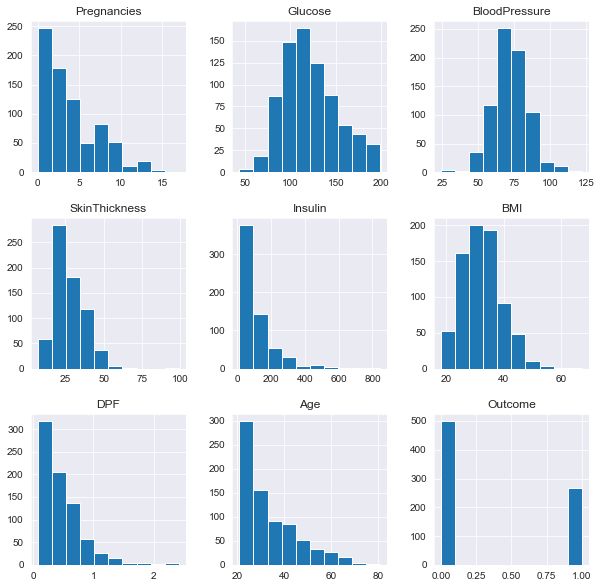

In [10]:
df.hist(figsize = (10,10));                  # Tells us the distribution of each column

  #### #
* Here we have seen the distribution of each features whether it is normal distribution or not.
* If the distribution is normal then we will replace the null values with mean
* If the distribution is not normal then we will replace the null values with median.
#### #

In [11]:
df.Glucose.fillna(df.Glucose.mean(),inplace=True)
df.BloodPressure.fillna(df.BloodPressure.mean(),inplace=True)
df.SkinThickness.fillna(df.SkinThickness.median(),inplace=True)
df.Insulin.fillna(df.Insulin.median(),inplace=True)
df.BMI.fillna(df.BMI.mean(),inplace=True)

In [12]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [13]:
df.dtypes[df.dtypes=='object'] 

Series([], dtype: object)

In [14]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

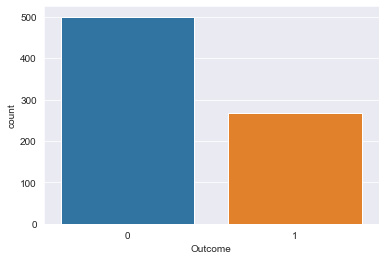

In [15]:
sns.countplot(x='Outcome',data =df)

Text(0.5, 1.0, 'PIE CHART')

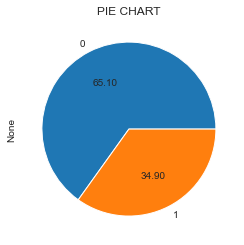

In [16]:
df.groupby('Outcome').size().plot(kind='pie', autopct='%.2f').set_title('PIE CHART')

#### # 
* from the count plot and bar plot we can say that around 65.10% of the people are Non diabetic and 34.90% are Diabetic.
* There is a class imbalance so to overcome that we will do oversampling
#### #

In [17]:
from sklearn.model_selection import train_test_split 

train,test = train_test_split(df,test_size = 0.2)

In [18]:
df_os = train[train.Outcome == 1]

train1 = pd.concat([train , df_os])                      # oversampling 

In [19]:
train = train1

In [20]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]

In [21]:
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [22]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(826, 8)
(154, 8)
(826,)
(154,)


In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x_std = ss.fit_transform(train_x)                                  # fitting and transforming to normal
test_x_std = ss.transform(test_x)

### 1) KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics                   
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV     

In [25]:
knn=KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10,15,25,30,50]}
grid_knn = GridSearchCV(knn,param_grid)
grid_knn.fit(train_x_std,train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 25, 30, 50]})

In [26]:
print("Tuned Parameters==>",grid_knn.best_params_)

Tuned Parameters==> {'n_neighbors': 5}


In [27]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(train_x_std,train_y)
pred_y_knn=knn.predict(test_x_std)

In [28]:
print(metrics.classification_report(test_y,pred_y_knn))
print(metrics.confusion_matrix(test_y,pred_y_knn))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80        98
           1       0.63      0.95      0.76        56

    accuracy                           0.78       154
   macro avg       0.79      0.82      0.78       154
weighted avg       0.84      0.78      0.78       154

[[67 31]
 [ 3 53]]


In [29]:
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
accu_knn= accuracy_score(test_y,pred_y_knn)
recall_knn= recall_score(test_y,pred_y_knn)
Prec_knn=precision_score(test_y,pred_y_knn)
f1_ratio_knn=f1_score(test_y,pred_y_knn)

In [30]:
# auc = Area under curve
# roc = receiver operating characteristic
# threshold= the assignment of pixel values in relation to the threshold value provided.
# In thresholding, each pixel value is compared with the threshold value. 
# If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255)
# tp= true positive rate
# fp= false positive rate

In [31]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
probas_pred_knn=knn.predict_proba(test_x_std)
fpknn, tpknn, thresholdsknn = roc_curve(test_y,probas_pred_knn[:,1],pos_label=1)
roc_auc_knn=auc(fpknn, tpknn)
print("AUC for K Nearest Neighbors : ",roc_auc_knn)

AUC for K Nearest Neighbors :  0.8719934402332361


In [33]:
print("Accuracy=",accu_knn, "\nRecall_score=",recall_knn, "\nPrecision=",Prec_knn,"\nF1_ratio=",f1_ratio_knn,"\nAUC=",roc_auc_knn)

Accuracy= 0.7792207792207793 
Recall_score= 0.9464285714285714 
Precision= 0.6309523809523809 
F1_ratio= 0.7571428571428572 
AUC= 0.8719934402332361


In [34]:
def plot_roc_curve(fpknn,tpknn):
    plt.plot(fpknn,tpknn,color='green',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

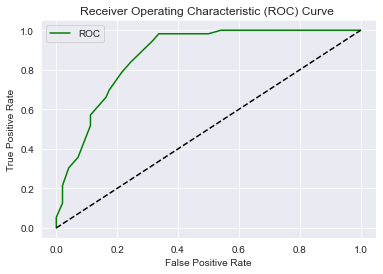

In [35]:
 plot_roc_curve(fpknn,tpknn)

### 2) Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid={'n_estimators':[200,500,1000]}
grid_rfc=RandomizedSearchCV(rfc,param_grid,n_iter=20)
grid_rfc.fit(train_x_std,train_y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'n_estimators': [200, 500, 1000]})

In [37]:
 # n_iter= (number of iterations) 

In [38]:
print("Tuned Parameters==>",grid_rfc.best_params_)

Tuned Parameters==> {'n_estimators': 1000}


In [39]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(train_x_std,train_y)
pred_y_rfc=rfc.predict(test_x_std)

In [40]:
print(metrics.classification_report(test_y,pred_y_rfc))
print(metrics.confusion_matrix(test_y,pred_y_rfc))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        98
           1       0.70      0.79      0.74        56

    accuracy                           0.80       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.81      0.80      0.80       154

[[79 19]
 [12 44]]


In [41]:
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
accu_rfc= accuracy_score(test_y,pred_y_rfc)
recall_rfc= recall_score(test_y,pred_y_rfc)
Prec_rfc=precision_score(test_y,pred_y_rfc)
f1_ratio_rfc=f1_score(test_y,pred_y_rfc)

In [42]:
probas_pred_rfc=rfc.predict_proba(test_x_std)
fprf, tprf, thresholdsrf = roc_curve(test_y,probas_pred_rfc[:,1],pos_label=1)
roc_auc_rfc = auc(fprf, tprf)
print("AUC for Random Forest : ",roc_auc_rfc)

AUC for Random Forest :  0.8679846938775511


In [43]:
print("Accuracy=",accu_rfc, "\nRecall_score=",recall_rfc, "\nPrecision=",Prec_rfc,"\nF1_ratio=",f1_ratio_rfc,"\nAUC=",roc_auc_rfc)

Accuracy= 0.7987012987012987 
Recall_score= 0.7857142857142857 
Precision= 0.6984126984126984 
F1_ratio= 0.7394957983193275 
AUC= 0.8679846938775511


In [44]:
def plot_roc_curve(fprf,tprf):
    plt.plot(fprf,tprf,color='red',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

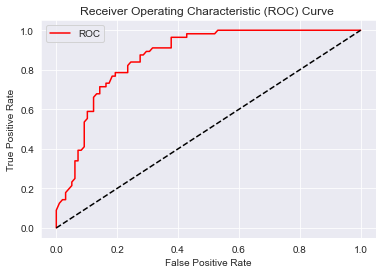

In [45]:
plot_roc_curve(fprf,tprf)

### 3) Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [47]:
lr.fit(train_x_std,train_y)
pred_y_lr=lr.predict(test_x_std)

In [48]:
print(metrics.classification_report(test_y,pred_y_lr))
print(metrics.confusion_matrix(test_y,pred_y_lr))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        98
           1       0.64      0.84      0.73        56

    accuracy                           0.77       154
   macro avg       0.77      0.79      0.77       154
weighted avg       0.80      0.77      0.78       154

[[72 26]
 [ 9 47]]


In [49]:
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
accu_lr= accuracy_score(test_y,pred_y_lr)
recall_lr= recall_score(test_y,pred_y_lr)
Prec_lr=precision_score(test_y,pred_y_lr)
f1_ratio_lr=f1_score(test_y,pred_y_lr)

In [50]:
probas_pred_lr=lr.predict_proba(test_x_std)
fplr, tplr, thresholdslr = roc_curve(test_y,probas_pred_lr[:,1],pos_label=1)
roc_auc_lr=auc(fplr, tplr)

In [51]:
print("Accuracy=",accu_lr, "\nRecall_score=",recall_lr, "\nPrecision=",Prec_lr,"\nF1_ratio=",f1_ratio_lr,"\nAUC=",roc_auc_lr)

Accuracy= 0.7727272727272727 
Recall_score= 0.8392857142857143 
Precision= 0.6438356164383562 
F1_ratio= 0.7286821705426357 
AUC= 0.8620626822157433


In [52]:
def plot_roc_curve(fplr,tplr):
    plt.plot(fplr,tplr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

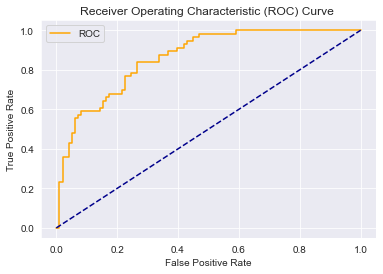

In [53]:
plot_roc_curve(fplr,tplr)

### 4) Decision Trees

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
param_grid={"criterion":["gini","entropy"]}
grid_dt=GridSearchCV(dt,param_grid)
grid_dt.fit(train_x_std,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [55]:
dt.fit(train_x_std,train_y)
pred_y_dt=dt.predict(test_x_std)

In [56]:
print(metrics.classification_report(test_y,pred_y_dt))
print(metrics.confusion_matrix(test_y,pred_y_dt))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        98
           1       0.64      0.57      0.60        56

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

[[80 18]
 [24 32]]


In [57]:
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
accu_DT= accuracy_score(test_y,pred_y_dt)
recall_DT= recall_score(test_y,pred_y_dt)
Prec_DT=precision_score(test_y,pred_y_dt)
f1_ratio_DT=f1_score(test_y,pred_y_dt)

In [58]:
probas_pred_dt=dt.predict_proba(test_x_std)
fpdt, tpdt, thresholdsdt = roc_curve(test_y,probas_pred_dt[:,1],pos_label=1)
roc_auc_dt=auc(fpdt, tpdt)

In [59]:
print("Accuracy=",accu_DT, "\nRecall_score=",recall_DT, "\nPrecision=",Prec_DT,"\nF1_ratio=",f1_ratio_DT,"\nAUC=",roc_auc_dt)

Accuracy= 0.7272727272727273 
Recall_score= 0.5714285714285714 
Precision= 0.64 
F1_ratio= 0.6037735849056605 
AUC= 0.6938775510204082


In [60]:
probas_pred_dt=dt.predict_proba(test_x_std)
fpdt, tpdt, thresholdsdt = roc_curve(test_y,probas_pred_dt[:,1],pos_label=1)
roc_auc_DT=auc(fpdt, tpdt)

In [61]:
def plot_roc_curve(fpdt,tpdt):
    plt.plot(fpdt,tpdt,color='grey',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show


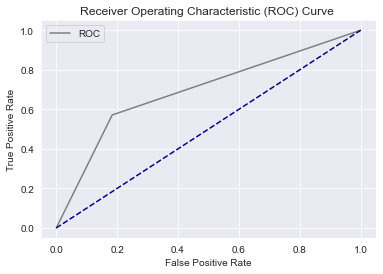

In [62]:
plot_roc_curve(fpdt,tpdt)

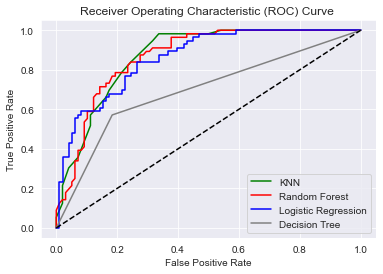

In [63]:
plt.plot(fpknn,tpknn,color='green',label='KNN')
plt.plot(fprf,tprf,color='red',label='Random Forest')
plt.plot(fplr,tplr,color='blue',label='Logistic Regression')
plt.plot(fpdt,tpdt,color='grey',label='Decision Tree')
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend()
plt.show
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [64]:
data={'Model':['K-Nearest Neighbours','Random Forest','Logistic','Decision Tress'],
      'Accuracy':[accu_knn,accu_rfc,accu_lr,accu_DT],
      'AUC':[roc_auc_knn,roc_auc_rfc,roc_auc_lr,roc_auc_DT],
      'Recall':[recall_knn,recall_rfc,recall_lr,recall_DT],
      'Precision':[Prec_knn,Prec_rfc,Prec_lr,Prec_DT],
      'F1_ratio':[f1_ratio_knn,f1_ratio_rfc,f1_ratio_lr,f1_ratio_DT]}
df=pd.DataFrame(data)
df_new=df.style.set_properties(**{'text-align':'left'})
df_new

,Model,Accuracy,AUC,Recall,Precision,F1_ratio
0,K-Nearest Neighbours,0.779221,0.871993,0.946429,0.630952,0.757143
1,Random Forest,0.798701,0.867985,0.785714,0.698413,0.739496
2,Logistic,0.772727,0.862063,0.839286,0.643836,0.728682
3,Decision Tress,0.727273,0.693878,0.571429,0.640000,0.603774


In [65]:
rfc.feature_importances_

array([0.08387231, 0.24903839, 0.08653829, 0.0829526 , 0.0785266 ,
       0.16990828, 0.11917689, 0.12998664])

In [66]:
x=pd.DataFrame(columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

<Axes: >

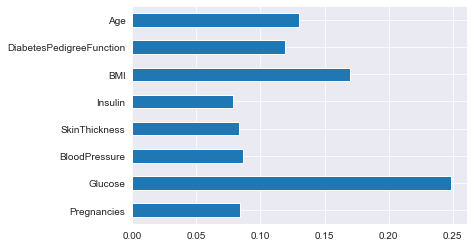

In [67]:
(pd.Series(rfc.feature_importances_, index=x.columns).plot(kind='barh'))

* From the above graph, it is clearly visible that Glucose is the feature which majorly affect the diabetes.

## Conclusion: 
* From the above comparison ,K-NN is the best classifier for the following data,It shows the highest f1 score. dataset is imbalance so f1 score is more approprite metric.

* Glucose is the main feature which majorly affect the diabetes. 
* This project gives an idea to control the diabetes based on different predictors.